# Demonstration of `dead_leaves` usage

## Import

In [6]:
from dead_leaves import DeadLeavesImage, DeadLeavesModel

%reload_ext autoreload
%autoreload 2

## Single image generation

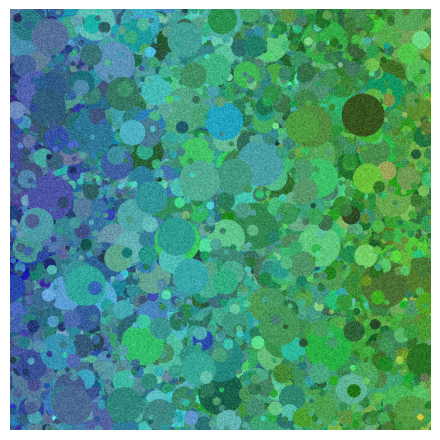

In [20]:
shape_params = {
    'area': {'powerlaw': {'low': 100.0, 'high': 10000.0, 'k': 1.5}}
}

model1 = DeadLeavesModel(
    "circular", 
    shape_params,
    (1000,1000)
    )
leaves, partition = model1.sample_partition()

color_params = {
    'H': {'normal': {
        'loc': {'from': 'x_pos', 'fn': lambda x: 0.001*x * 0.3 + (1-0.001*x) * 0.6}, 
        'scale': 0.05
        }},
    'S': {'normal': {'loc': 0.6, 'scale': 0.1}},
    'V': {'normal': {'loc': 0.6, 'scale': 0.1}}
}

texture_params = {
    'gray': {'normal': {'loc': 0, 'scale': 0.1}}
}

colormodel1 = DeadLeavesImage(
    leaves, 
    partition, 
    color_params, 
    texture_params
    )
image = colormodel1.sample_image()
colormodel1.show(image)

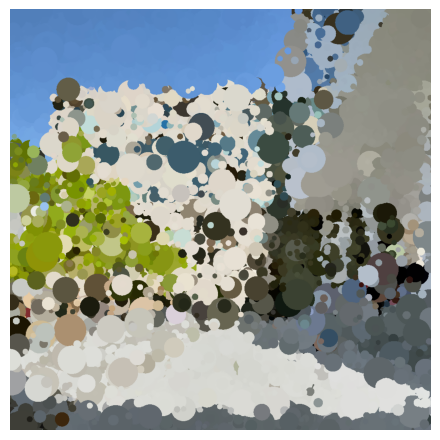

In [34]:
from PIL import Image
from torchvision.transforms.functional import pil_to_tensor

reference_image = Image.open('ulb_5136-2516.jpg').resize((1000,1000), box=[0,0,2500,2500])

image_tensor = pil_to_tensor(pic=reference_image) / 255

shape_params = {
    'area': {'powerlaw': {'low': 100.0, 'high': 5000.0, 'k': 1.5}}
}

model1 = DeadLeavesModel(
    "circular", 
    shape_params,
    (1000,1000)
    )
leaves, partition = model1.sample_partition()

color_params = {
    'R': {'constant': {'value': {'from': ['x_pos','y_pos'], 'fn': lambda x: image_tensor[0,x['y_pos'].astype(int),x['x_pos'].astype(int)]}}},
    'G': {'constant': {'value': {'from': ['x_pos','y_pos'], 'fn': lambda x: image_tensor[1,x['y_pos'].astype(int),x['x_pos'].astype(int)]}}},
    'B': {'constant': {'value': {'from': ['x_pos','y_pos'], 'fn': lambda x: image_tensor[2,x['y_pos'].astype(int),x['x_pos'].astype(int)]}}}
}

texture_params = {
    'gray': {'constant': {'value': 0}}
}

colormodel1 = DeadLeavesImage(
    leaves, 
    partition, 
    color_params, 
    texture_params
    )
image = colormodel1.sample_image()
colormodel1.show(image)

## Mask

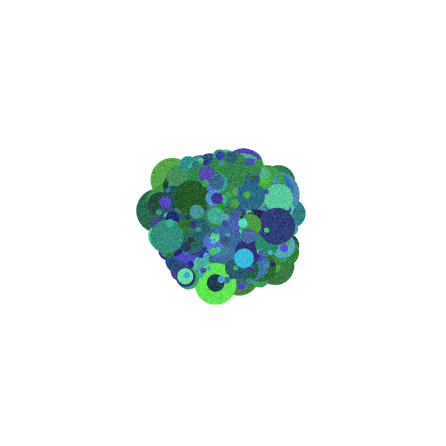

In [ ]:
import torch

position_mask = model1._circular_leaf_mask(
    {
        'x_pos': 500,
        'y_pos': 500, 
        'area': torch.tensor([80000], device = model1.device)
        }
)

model2 = DeadLeavesModel(
    "circular",
    shape_params,
    (1000,1000),
    position_mask
)

leaves, partition = model2.sample_partition()

colormodel2 = DeadLeavesImage(
    leaves, 
    partition, 
    color_params, 
    texture_params,
    background_color = torch.tensor([1.,1.,1.], device=model2.device)
    )
image = colormodel2.sample_image()
colormodel2.show(image)